# The Great Pyramid

This is an estimate of the number of people needed to raise stones to the top of the [great pyramid](https://en.wikipedia.org/wiki/Great_Pyramid_of_Giza) using basic physics, such as force, energy, and power. It relies solely on reasonable estimates of known dimensions of the great pyramid and typical human labor capacity. The analysis will show that it is possible for crews of workers to raise 2.5 ton limestones to almost any level using ropes alone. Each crew would stand on an unfinished level and pull wooden sleds carrying stones up the 51.86 degree incline of the pyramid. This solution does not require ramps, pulleys, levers or any other mechanical advantage. It only requires coordination, rope, and well fed crews. If a crew tires after raising a set of stones, they could be quickly replaced by another well rested crew. The analysis will estimate the minimum crew size, number of crews required, the rate at which stones can be raised, and the maneuvering area available at each level.

The dimensions of the great pyramid are shown below:

![Pyramid](data/Khufu.png)

| Parameter | Value |
| ----- | ----:|
| Total number of stones| 2.5 million |
| Average mass of each stone | 2.5 tons |
| Total build time | 20 years |
| Power available per worker | 200 Calories/day |
| Active build time | 3 months/year |
| Pyramid slope | 51.86 degrees |
| Pyramid height | 146.5 meters |
| Pyramid base | 230 m |
| Coefficient of friction | 0.3 |
| Number of layers | 210 |

| Course | Height | Amount of Material |
| ------ |:------:| ------------------:|
| 1 | 15m | 30% |
| 2 | 30m | 22% |
| 3 | 50m | 30% |
| 4 | 100m | 15% |
| 5 | 146m | 3% |

In [1]:
from math import *
import pandas as pd
import matplotlib.pyplot as plt

# All values are in SI (MKS) units

lbm_per_kg = 2.20462
newtons_per_lbf = 4.44822
joules_per_kcal = 4184
sec_per_day = 24 * 3600
watts_per_hp = 746

# Total number of stones
N_s = 2.5e6

# Mass of one stone in kg
m_s = 2.5 * 2000 / lbm_per_kg

# Total build time in seconds
T_b = 20 * 365.25 * sec_per_day

# Average available power per crew member in kilocalories (nutrition calorie)
P_w_kcal = 200

# Average available power on crew member in Watts
P_w = P_w_kcal * joules_per_kcal / sec_per_day

# Pyramid slope in radians
theta = 51.86*pi/180

# Pyramid base length in meters
l_b = 230

# Coefficient of friction between limestone and wood sleds
mu = 0.3

# Acceleration of gravity in m/2^s
g = 9.81

# Number of layers
N_l = 210

# Height of pyramid in meters
h_max = 146.5

# Pulling Force

It is possible for a crew of men to stand on top of one flat level and simply pull a single stone up the side of a pyramid covered with smooth casing stones.  It is expected that smooth casing stones were added at the same time each layer of rough blocks were added, which is very likely. This simple approach does not require large ramps, elaborate machines, deep knowledge, or alien intervention. It just requires many crews of workers pulling on ropes attached to rough stones. Of course, a number of additional crews are needed to place stones and align stones properly, but the solutions to those problems are well documented.

This analysis focuses solely on the rigging problem of raising stones to the proper level just prior to final placement.

The [force required](https://en.wikipedia.org/wiki/Inclined_plane) to pull one stone up the side of the pyramid is

$$ F_p = m_s g (sin \theta + \mu cos \theta)$$

Where $m_s$ is the mass of one stone, $g$ is acceleration of gravity, $\theta$ is the pyramid slope, and $\mu$ is the coefficient of friction.

Given the parameters above, the pulling force is

In [2]:
F_p = m_s * g * (sin(theta) + mu*cos(theta))
print('%.4f N' % F_p)
print('%.4f lbf' % (F_p / newtons_per_lbf) )

21620.8639 N
4860.5653 lbf


$$ F_p \approx 21620 N  $$

or

$$ F_p \approx 4860 lbf $$

This is slightly less than the 5000 lb weight of each stone, which is due to the slope of incline and static friction. Dynamic friction is perhaps lower, so the actual pulling force while in motion may be less.

# Energy to Raise Stones

Energy is force times distance moved. The distance along the slope up to a height $h$ is

$$ d = \frac{h}{sin \theta} $$

Given the force derived earlier, energy required to raise a single stone to a height $h$ is

$$ E_s = \frac{F_p h}{sin \theta} $$

For all stones the total energy is

$$ E_t = \frac{F_p}{sin \theta} \sum_{i=1}^{m} h N_{blocks} $$

An approximate estimate for comparison is:

$$ E_t = \frac{F_p N_s}{sin \theta} (15m \times 0.3 + 30m \times 0.22 + 50m \times 0.3 + 100m \times 0.15 + 146m \times 0.03) $$

The total energy is estimate in two steps:
 * Compute the total volume to get average block volume
 * Compute energy per layer given average block volume

The iterative computation will be compared with the approximate estimate.

The total energy is

In [3]:
dh = h_max / N_l
total_volume = 0
h = 0
tan_theta2 = tan(theta)**2
for i in range(N_l):
    th = (h_max - h)**2
    A_f = 4 * th / tan_theta2
    total_volume += dh * A_f
    h += dh
print('Total volume: %.3e m^3' % total_volume)
block_volume = total_volume/N_s
print('Block volume: %.3e m^3' % block_volume)

E_t = 0
h = 0
for i in range(N_l):
    th = (h_max - h)**2
    A_f = 4 * th / tan_theta2
    num_blocks = dh * A_f / block_volume
    E_t += F_p * num_blocks * h / sin(theta)
    h += dh
    
print('Total energy: %.2e Joules' % E_t)
print('Total energy: %.2e kcal' % (E_t/joules_per_kcal))

E_t_approx = F_p * N_s * (15*0.3 + 30*0.22 + 50*0.3 + 100*0.15 + 146*0.03) / sin(theta)
print('Approximate: %.2e Joules' % E_t_approx)
print('Approximate: %.2e kcal' % (E_t_approx/joules_per_kcal))

Total volume: 2.603e+06 m^3
Block volume: 1.041e+00 m^3
Total energy: 2.50e+12 Joules
Total energy: 5.97e+08 kcal
Approximate: 3.13e+12 Joules
Approximate: 7.47e+08 kcal


The iterative estimate is somewhat less than the approximate energy, which is reasonable.

$$ E_t \approx 2.5 \times 10^{12} J $$

or

$$ E_t \approx 5.97 \times 10^8 {kcal} $$

# Average Power

The average power required to raise all stones is

$$ P_{avg} = \frac{E_t}{T_b} $$

In [4]:
P_avg = E_t/T_b
print('%.2f W' % (P_avg))
print('%.2f HP' % (P_avg/watts_per_hp))

3959.59 W
5.31 HP


In watts, the value is:

$$ P_{avg} \approx 3960 W $$

In horse power:

$$ P_{avg} \approx 5.31 {HP} $$

This surprisingly modest number is due to the 20 year build time for the pyramid. Even though the size of the pyramid is staggering, the build time is equally large. By inspection, we can imagine the number of workers needed to deliver this power, which is not as large as might be expected.

5.3 horse power would be easily available using a few draught animals, but that would require coaxing animals to climb to high levels and repeatedly pulling over a significant distance. This presents several logistical challenges, which might explain why there is little evidence of animal power used to raise stones. Humans can stand in one place and pull ropes hand over hand with upper body power or two crews could alternate pulling one set of ropes using lower body power. Perhaps different techniques were used depending on available maneuvering area.

# Workforce Size

Human are not efficient machines, perhaps 20% thermal efficiency. Given a modest diet where 1000 calories are burned, one worker might deliver 200 calories/day of mechanical work. This is an average power of 9.7 Watts. Assuming work is performed during only one season (one quarter of a year), the total number of workers required to raise all blocks is given by

$$ N_w = 4 \frac{P_{avg}}{P_w} $$

The approximate number of workers is

In [5]:
N_w = 4 * P_avg / P_w
print('%d workers' % N_w)

1635 workers


$$ N_w \approx 1635 $$

Other estimates of total workforce are about 10 times this value, which makes sense given resting time, and many other tasks, such as cutting and transporting stones, finish work, food preparation, management, accounting, and other support activities.

To lift a single stone, a crew of workers would be required to raise each stone. Assuming each worker can pull 75 lbs, the size of a single lifting crew is

$$ N_{lc} = \frac{F_p}{75 lbf} $$

The number of workers in a lifting crew is

In [6]:
F_1p = 75 * newtons_per_lbf
N_lc = F_p / F_1p
print('%.1f workers per lifting crew' % N_lc)

64.8 workers per lifting crew


$$ N_{lc} \approx 65 $$

That's 65 workers per lifting crew. The total number of crews is

$$ N_c = \frac{N_w}{N_{lc}} $$

In [7]:
N_c = N_w / N_lc
print('%.1f crews' % N_c)

25.2 crews


Roughly 25 concurrent crews of 65 people are required just to raise all stones over 20 years.

# Stone Raising Rate

Assuming all 25 crews are operating concurrently, it is possible to estimate the block raising rate. 200 calories per day of worker output is an average number. Humans are not machines and need rest, so in practice, crews may only raise blocks as little as 4 hours per day. Assuming all 200 calories per worker is delivered in a four hour shift, the available peak crew power would be six times the average daily power:

$$ P_{cp} = 6 N_{lc} P_w$$

In [8]:
P_cp = 6 * N_lc * P_w
print('%.2f W' % (P_cp))
print('%.2f HP' % (P_cp/watts_per_hp))

3766.04 W
5.05 HP


This value is about 3.8 kW or just a little over 5 horsepower for a crew of 65 workers. This suggests about 13 humans can do the same amount of work as one horse for four hours a day, which seems reasonable.

The average velocity of a single block raised by a crew is given by

$$ v_{bc} = \frac{P_{cp}}{F_p} $$

In [9]:
feet_per_meter = 3.28084
v_bc = P_cp / F_p
print('%.3f m/s' % (v_bc))
print('%.3f ft/s' % (v_bc * feet_per_meter))

0.174 m/s
0.571 ft/s


The rate along the slope is about 0.17 $m/s$ or 0.57 $ft/s$.

To raise one stone to a height h, the time required is

$$ t = \frac{h}{v_{bc} sin \theta} $$

In [10]:
h = 30
t = h/(v_bc * sin(theta))
print('%.1f seconds' % (t))
print('%.1f minutes' % (t/60))

219.0 seconds
3.6 minutes


To raise one block to a height of 30m, which includes more than 50% of all stones, the time is about 219 seconds or 3.6 minutes. With all 25 crews operating concurrently, one stone could be raised every nine seconds or less.

# Logistics

Fitting 1635 workers on a level at one time requires room to maneuver. The area available is reduced higher up the pyramid. Assuming all 25 crews are operating concurrently and each worker requires at least $1 m^2$, the minimum area required is $A_c \approx 1635 m^2$.

The available area at a height $h$ is

$$ A_l = \left(\frac{2 (h_{max} - h)}{tan \theta}\right)^2 $$

Where $l_b$ is the length of the base of the pyramid.

The fraction of available maneuvering area is

$$ r_m = \frac{A_l-A_c}{A_l} $$

A plot of available maneuvering area and completed volume is shown below.

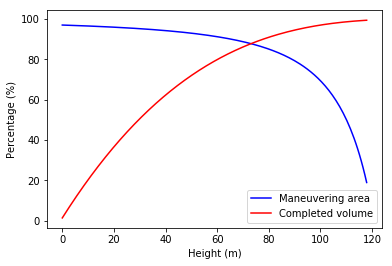

At a height of 100.5 m, 97.0 % of the pyramid is complete.


In [11]:
A_c = N_w
dh = h_max / N_l
h = 0
tan_theta2 = tan(theta)**2
heights = []
areas = []
volumes = []
volume = 0
for i in range(N_l):
    th = (h_max - h)**2
    A_l = 4 * th / tan_theta2
    volume += dh * A_l
    r_a = (A_l-A_c)/A_l
    heights.append(h)
    areas.append(100*r_a)
    volumes.append(100*(volume/total_volume))
    h += dh

limit = -40
plt.plot(heights[0:limit], areas[0:limit], label='Maneuvering area', color='blue')
plt.plot(heights[0:limit], volumes[0:limit], label='Completed volume', color='red')
plt.ylabel('Percentage (%)')
plt.xlabel('Height (m)')
plt.legend(loc='best')
plt.show()

limit = -66
print('At a height of %.1f m, %.1f %% of the pyramid is complete.' % (heights[limit], volumes[limit]))

Even at a height of 100m, where only 3% of the pyramid remains, more than two times the area required by all 25 lifting crews is still available. This should leave sufficient room for others to position stones after they have been lifted. At 117m, there is just enough room for all 25 crews, so stone placement will slow down. Fortunately, fewer stones are required at the highest levels.

# Ramps and Stone Size

This theory might explain why there is little evidence of external or internal ramps, simply because a smooth pyramid can act as the ramp itself. It might also explain how large granite blocks were hauled up to the kings chamber. Considering the required rate of block raising, a wide ramp is needed. Narrow ramps that can only support one or two blocks side by side seem like a bottleneck. Ramps with right angles require more time to rotate and orient blocks. Using the sides of the pyramid offers the largest ramp possible on all four sides, so the only limitation would be the number of workers that could be on top at any one time. Even if one set of crews becomes fatigued raising stones, they could be relieved by another crew later in the day. It is possible that two or more shifts of lifting crews were used to minimize fatigue or injury. If ropes were long enough, it is possible that workers could have walked down the opposite slope of the pyramid, using their own weight to counter the weight of stones they were attempting to lift.

A similar energy analysis can be done using conventional shallow ramps to raise stones. Interestingly, a ramp with a 7% grade requires almost 5 times more energy to raise all 2.5 million stones than using the side of pyramid. Although a shallow ramp reduces the amount of force required to move stones, the distance travelled is much farther, so more energy is lost in friction. Additionally, a conventional ramp requires workers to climb the height of the pyramid along with the stone they are pulling, so they must lift their own weight in addition to the weight of the stone. This requires more energy, which is not used to lift stones. Clearly, it's a highly inefficient strategy.

The Egyptians were free to decide how big to make the rough limestone blocks. They could have made them small enough for one person to carry, but they chose not to. After many pyramid construction attempts, they decided that 2.5 ton blocks were small enough to handle without too much difficulty, so raising these stones had to be straightforward. It seems that simply dragging blocks up the side of a smooth pyramid is a straightforward solution that they could have easily developed on their own. It probably seemed so obvious to them that it made no sense to document it.

# Summary

A crew of about 65 workers can raise 2.5 ton stones using simple ropes alone. Over a 20 year period, 25 concurrent crews totalling roughly 1625 workers are sufficient to raise all 2.5 million stones. There are a number of factors that could reduce the number of workers required. Friction could be reduced using available lubricants or particularly strong, well fed workers could have been selected for this critical role.

Building the pyramids seems staggering to us today, but that may be due more to our short attention span and availability of powerful machines to do the heavy lifting. We don't stop to consider that a large, organized workforce, all pulling together at the same time, can do a lot of work. It's not magic, just dedication and arithmetic.

In the modern day, we expect a return on our investment in a reasonable time, perhaps five or ten years for large public works projects. For the pharoahs, 20 years was a completely acceptable delivery schedule for their investment and exit strategy. To achieve higher rates of return, we build powerful machines that could be operated by a single person. We just don't accept slow progress over a long period of time because our expectations and labor costs are so high. The pharoahs on the other hand, were in the opposite position. They had a large workforce that was willing dedicate themselves to a single cause over a significant part of their lifetime. This dedication is perhaps the real achievement we should admire.

Copyright (c) Madhu Siddalingaiah 2020